In [9]:
#import dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

In [10]:
import requests
from config import weather_api_key

In [11]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [12]:
#create a set of random lat and long combinations.
lats = np.random.uniform(-90, 90, size=1500)
lngs = np.random.uniform(-180, 180, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [13]:
#create a list of coordinates using zip
coordinates = list(lat_lngs)

In [14]:
#create a list for holding cities
cities = []

#Identify the nearest city for each lat and long combo
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    #if city is unique
    if city not in cities:
        cities.append(city)
        
#print the city count to confirm sufficient count
len(cities)

620

In [15]:
### GAME PLAN
##1 Import dependencies and Initialize Counter/Empty LIst that will hold weather data
##2 Loop through the cities list
##3 Group the cities in sets of 50 to log the process as we find the weather data for each city
###3a two counters needed: one to log the city count and another for sets
##4 build the city_url or endpoint for each city
##5 log the url and record/set numbers
##6 Make an API request for each city
##7 Parse JSON Data for
### City/Country, Date, Lat/long, Max Temp, Humidity, Clouds, Windspeed
##8 Add data to a list in a dictionary and convert to dataframe

In [16]:
##1 Import dependencies 

#import time library and datetime module from datetime library
import time
from datetime import datetime

In [17]:
##1b initialize counter and empty list

#create an empty list to hold the weather data
city_data = []

#print the beginning of the logging.
print(f"Beginning Data Retrieval     ")
print("------------------------------")


#create counters.
record_count = 1
set_count = 1

##2 loop through cities 
#create a for loop using enumerate() method to retrieve both city and its index from the list
for i, city in enumerate(cities):
    
    #group cities in sets of 50 for logging purposes
    # check if the remainder of the index divided by 50 is equal to 0 and if the index is greater than or equal to 50
    if (i % 50 == 0 and i >= 50):
        #if true, icncrease set_count and record_count by 1
        set_count += 1
        record_count = 1
        #open weather api only allows 50 queries per minute so pause for a minute
        time.sleep(60)
    
    #create endpoint URL with each city.
    #remove blankspaces in cityname by replacing " " with a "+"
    city_url = url + "&q=" + city.replace(" ","+")
    
    #Log the URL, record and set numbers and the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    #add 1 to record count
    record_count += 1
    
# Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        #parse out the needed data
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        
        #convert the date to ISO standard
        city_date = datetime.utcfromtimestamp(city_weather['dt']).strftime('%Y-%m-%d %H:%M:%S')
        
        #append city information into city_data list
        city_data.append({'City': city.title(),
                          'Lat': city_lat,
                          'Lng': city_lng,
                          'Max Temp': city_max_temp,
                          'Humidity': city_humidity,
                          'Cloudiness': city_clouds,
                          'Wind Speed': city_wind,
                          'Country': city_country,
                          'Date': city_date})
#if an error is experienced, skip the city
    except:
        print("City not found. Skipping")
        pass
    
#indicate that data loading is complete
print('----------------------------')
print('Data Retrieval Complete     ')
print('----------------------------')


Beginning Data Retrieval     
------------------------------
Processing Record 1 of Set 1 | atar
Processing Record 2 of Set 1 | pimentel
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | busselton
Processing Record 5 of Set 1 | mount gambier
Processing Record 6 of Set 1 | saskylakh
Processing Record 7 of Set 1 | rocha
Processing Record 8 of Set 1 | qaanaaq
Processing Record 9 of Set 1 | vaini
Processing Record 10 of Set 1 | labuhan
Processing Record 11 of Set 1 | kargasok
Processing Record 12 of Set 1 | atuona
Processing Record 13 of Set 1 | puerto ayora
Processing Record 14 of Set 1 | avarua
Processing Record 15 of Set 1 | hermanus
Processing Record 16 of Set 1 | lorengau
Processing Record 17 of Set 1 | punta arenas
Processing Record 18 of Set 1 | bafoulabe
Processing Record 19 of Set 1 | georgetown
Processing Record 20 of Set 1 | kapaa
Processing Record 21 of Set 1 | codrington
Processing Record 22 of Set 1 | hare bay
Processing Record 23 of Set 1 | champasak
Proc

Processing Record 39 of Set 4 | norman wells
Processing Record 40 of Set 4 | hambantota
Processing Record 41 of Set 4 | kieta
Processing Record 42 of Set 4 | new norfolk
Processing Record 43 of Set 4 | mirnyy
Processing Record 44 of Set 4 | ternate
Processing Record 45 of Set 4 | muskegon
Processing Record 46 of Set 4 | fortuna
Processing Record 47 of Set 4 | caernarfon
Processing Record 48 of Set 4 | ocumare del tuy
Processing Record 49 of Set 4 | pacific grove
Processing Record 50 of Set 4 | kavaratti
Processing Record 1 of Set 5 | muisne
Processing Record 2 of Set 5 | guerrero negro
Processing Record 3 of Set 5 | panzhihua
Processing Record 4 of Set 5 | luderitz
Processing Record 5 of Set 5 | skalistyy
City not found. Skipping
Processing Record 6 of Set 5 | petropavlovsk-kamchatskiy
Processing Record 7 of Set 5 | turangi
Processing Record 8 of Set 5 | jamame
Processing Record 9 of Set 5 | belawan
Processing Record 10 of Set 5 | yeroham
Processing Record 11 of Set 5 | sandpoint
Proce

Processing Record 30 of Set 8 | acajutla
Processing Record 31 of Set 8 | lagoa
Processing Record 32 of Set 8 | careiro da varzea
Processing Record 33 of Set 8 | tabou
Processing Record 34 of Set 8 | kudahuvadhoo
Processing Record 35 of Set 8 | nadym
Processing Record 36 of Set 8 | karkaralinsk
City not found. Skipping
Processing Record 37 of Set 8 | roald
Processing Record 38 of Set 8 | altamira
Processing Record 39 of Set 8 | kesinga
Processing Record 40 of Set 8 | chone
Processing Record 41 of Set 8 | canosa di puglia
Processing Record 42 of Set 8 | mys shmidta
City not found. Skipping
Processing Record 43 of Set 8 | sorong
Processing Record 44 of Set 8 | hay river
Processing Record 45 of Set 8 | marawi
Processing Record 46 of Set 8 | shanghai
Processing Record 47 of Set 8 | barra da estiva
Processing Record 48 of Set 8 | terrasini
Processing Record 49 of Set 8 | bandarbeyla
Processing Record 50 of Set 8 | turkistan
Processing Record 1 of Set 9 | belmonte
Processing Record 2 of Set 9

Processing Record 19 of Set 12 | rawson
Processing Record 20 of Set 12 | mecca
Processing Record 21 of Set 12 | kandrian
Processing Record 22 of Set 12 | awbari
Processing Record 23 of Set 12 | gasa
Processing Record 24 of Set 12 | juniyah
City not found. Skipping
Processing Record 25 of Set 12 | paraiso
Processing Record 26 of Set 12 | bilma
Processing Record 27 of Set 12 | matadi
Processing Record 28 of Set 12 | jhanjharpur
Processing Record 29 of Set 12 | ostrovnoy
Processing Record 30 of Set 12 | japura
Processing Record 31 of Set 12 | tahta
Processing Record 32 of Set 12 | senmonorom
City not found. Skipping
Processing Record 33 of Set 12 | sint michiel
City not found. Skipping
Processing Record 34 of Set 12 | balkhash
Processing Record 35 of Set 12 | mollendo
Processing Record 36 of Set 12 | yenagoa
Processing Record 37 of Set 12 | kruisfontein
Processing Record 38 of Set 12 | xiongzhou
Processing Record 39 of Set 12 | bilibino
Processing Record 40 of Set 12 | paamiut
Processing 

In [18]:
len(city_data)

571

In [20]:
city_data_df = pd.DataFrame(city_data)
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Atar,20.5169,-13.0499,79.65,12,12,6.64,MR,2022-10-27 03:00:49
1,Pimentel,-6.8367,-79.9342,62.08,86,15,13.02,PE,2022-10-27 03:00:50
2,Ushuaia,-54.8000,-68.3000,47.86,57,75,9.22,AR,2022-10-27 02:58:49
3,Busselton,-33.6500,115.3333,62.02,41,18,2.68,AU,2022-10-27 03:00:51
4,Mount Gambier,-37.8333,140.7667,58.91,94,100,20.71,AU,2022-10-27 03:00:51


In [22]:
# create the output file (CSV)
output_data_file = 'weather_data/cities.csv'

#export the city_data into a CSV.
city_data_df.to_csv(output_data_file, index_label='City_ID')

In [23]:
city_data

[{'City': 'Atar',
  'Lat': 20.5169,
  'Lng': -13.0499,
  'Max Temp': 79.65,
  'Humidity': 12,
  'Cloudiness': 12,
  'Wind Speed': 6.64,
  'Country': 'MR',
  'Date': '2022-10-27 03:00:49'},
 {'City': 'Pimentel',
  'Lat': -6.8367,
  'Lng': -79.9342,
  'Max Temp': 62.08,
  'Humidity': 86,
  'Cloudiness': 15,
  'Wind Speed': 13.02,
  'Country': 'PE',
  'Date': '2022-10-27 03:00:50'},
 {'City': 'Ushuaia',
  'Lat': -54.8,
  'Lng': -68.3,
  'Max Temp': 47.86,
  'Humidity': 57,
  'Cloudiness': 75,
  'Wind Speed': 9.22,
  'Country': 'AR',
  'Date': '2022-10-27 02:58:49'},
 {'City': 'Busselton',
  'Lat': -33.65,
  'Lng': 115.3333,
  'Max Temp': 62.02,
  'Humidity': 41,
  'Cloudiness': 18,
  'Wind Speed': 2.68,
  'Country': 'AU',
  'Date': '2022-10-27 03:00:51'},
 {'City': 'Mount Gambier',
  'Lat': -37.8333,
  'Lng': 140.7667,
  'Max Temp': 58.91,
  'Humidity': 94,
  'Cloudiness': 100,
  'Wind Speed': 20.71,
  'Country': 'AU',
  'Date': '2022-10-27 03:00:51'},
 {'City': 'Saskylakh',
  'Lat': 71.9

In [24]:
### MATPLOTLIB TIME
#extract relevant fields from df for plotting
lats = city_data_df['Lat']
max_temps = city_data_df['Max Temp']
humidity = city_data_df['Humidity']
cloudiness = city_data_df['Cloudiness']
wind_speed = city_data_df['Wind Speed']

In [25]:
#import the time module
import time

#get today's date in seconds
today = time.time()
today

1666854249.7449753

In [27]:
#get todays date in seconds
today = time.strftime('%x')
today

'10/27/22'

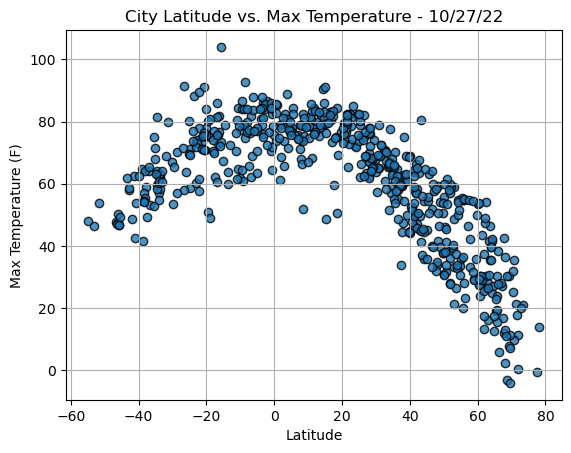

In [33]:
#build scatter plot for lat vs max temp
plt.scatter(lats,
           max_temps,
           edgecolor='black', linewidths=1, marker='o',
           alpha=0.8, label='Cities')

#incorporate the other graph properties
plt.title(f'City Latitude vs. Max Temperature - '+ time.strftime('%x'))
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')

plt.grid(True)
plt.savefig('weather_data/Fig1.png')
plt.show()

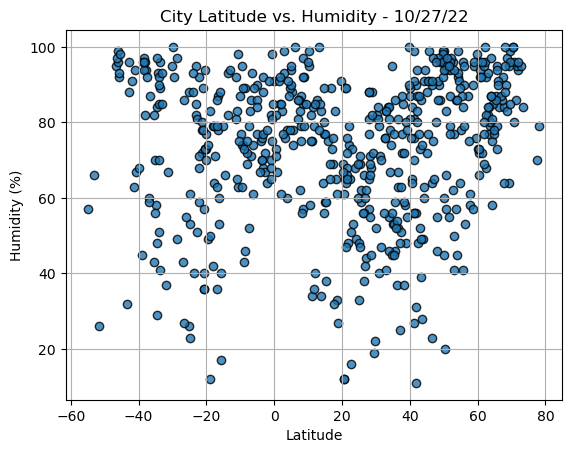

In [37]:
#build scatter plot for lat vs Humidity
plt.scatter(lats,
           humidity,
           edgecolor='black', linewidths=1, marker='o',
           alpha=0.8, label='Cities')

#incorporate the other graph properties
plt.title(f'City Latitude vs. Humidity - '+ time.strftime('%x'))
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')

plt.grid(True)
plt.savefig('weather_data/Fig2.png')
plt.show()

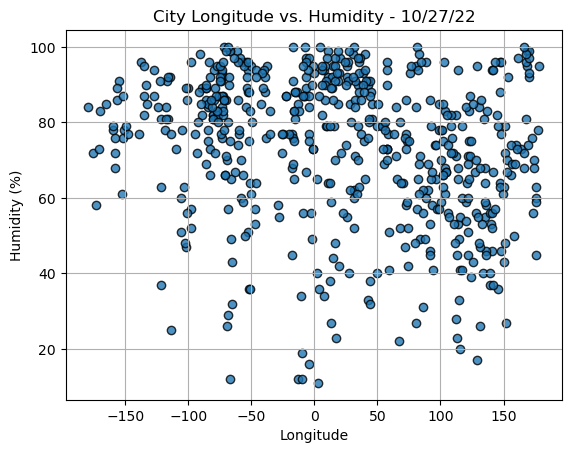

In [36]:
#build scatter plot for lng vs Humidity
lngs = city_data_df['Lng']

plt.scatter(lngs,
           humidity,
           edgecolor='black', linewidths=1, marker='o',
           alpha=0.8, label='Cities')

#incorporate the other graph properties
plt.title(f'City Longitude vs. Humidity - '+ time.strftime('%x'))
plt.ylabel('Humidity (%)')
plt.xlabel('Longitude')

plt.grid(True)
#plt.savefig('weather_data/Fig3.png')
plt.show()

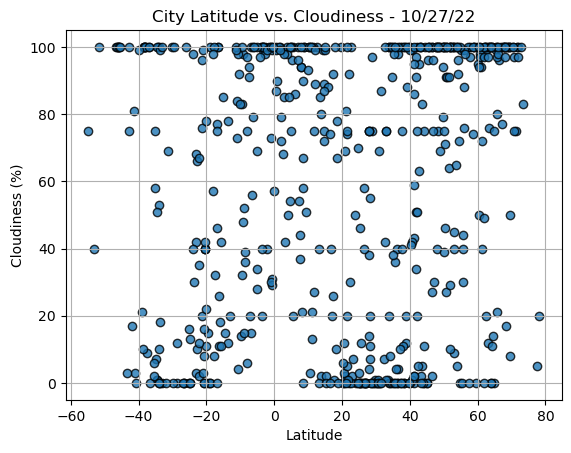

In [39]:
#build scatter plot for lat vs Cloudiness
plt.scatter(lats,
           cloudiness,
           edgecolor='black', linewidths=1, marker='o',
           alpha=0.8, label='Cities')

#incorporate the other graph properties
plt.title(f'City Latitude vs. Cloudiness - '+ time.strftime('%x'))
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')

plt.grid(True)
plt.savefig('weather_data/Fig3.png')
plt.show()

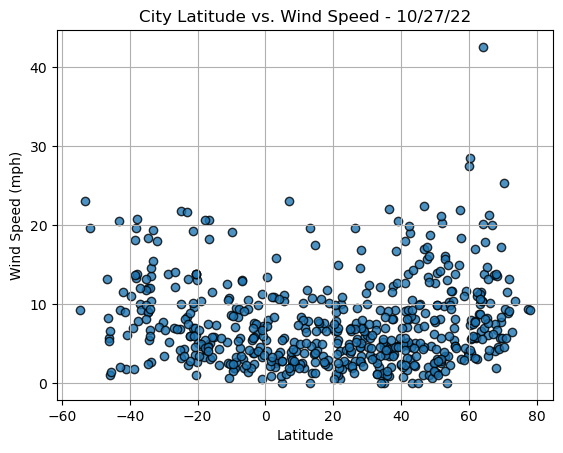

In [40]:
#build scatter plot for lat vs Wind Speed
plt.scatter(lats,
           wind_speed,
           edgecolor='black', linewidths=1, marker='o',
           alpha=0.8, label='Cities')

#incorporate the other graph properties
plt.title(f'City Latitude vs. Wind Speed - '+ time.strftime('%x'))
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')

plt.grid(True)
plt.savefig('weather_data/Fig4.png')
plt.show()